# Let's go motherfuckers



In [1]:
import requests

# Fetch constructors
constructors_response = requests.get('https://api.jolpi.ca/ergast/f1/2025/constructors.json')
constructors_data = constructors_response.json()

# Fetch drivers
drivers_response = requests.get('https://api.jolpi.ca/ergast/f1/2025/drivers.json')
drivers_data = drivers_response.json()

In [2]:
drivers_data

{'MRData': {'xmlns': '',
  'series': 'f1',
  'url': 'http://api.jolpi.ca/ergast/f1/2025/drivers.json',
  'limit': '30',
  'offset': '0',
  'total': '20',
  'DriverTable': {'season': '2025',
   'Drivers': [{'driverId': 'albon',
     'permanentNumber': '23',
     'code': 'ALB',
     'url': 'http://en.wikipedia.org/wiki/Alexander_Albon',
     'givenName': 'Alexander',
     'familyName': 'Albon',
     'dateOfBirth': '1996-03-23',
     'nationality': 'Thai'},
    {'driverId': 'alonso',
     'permanentNumber': '14',
     'code': 'ALO',
     'url': 'http://en.wikipedia.org/wiki/Fernando_Alonso',
     'givenName': 'Fernando',
     'familyName': 'Alonso',
     'dateOfBirth': '1981-07-29',
     'nationality': 'Spanish'},
    {'driverId': 'antonelli',
     'permanentNumber': '12',
     'code': 'ANT',
     'url': 'https://en.wikipedia.org/wiki/Andrea_Kimi_Antonelli',
     'givenName': 'Andrea Kimi',
     'familyName': 'Antonelli',
     'dateOfBirth': '2006-08-25',
     'nationality': 'Italian'},
 

In [3]:
constructors_data

{'MRData': {'xmlns': '',
  'series': 'f1',
  'url': 'http://api.jolpi.ca/ergast/f1/2025/constructors.json',
  'limit': '30',
  'offset': '0',
  'total': '10',
  'ConstructorTable': {'season': '2025',
   'Constructors': [{'constructorId': 'alpine',
     'url': 'http://en.wikipedia.org/wiki/Alpine_F1_Team',
     'name': 'Alpine F1 Team',
     'nationality': 'French'},
    {'constructorId': 'aston_martin',
     'url': 'http://en.wikipedia.org/wiki/Aston_Martin_in_Formula_One',
     'name': 'Aston Martin',
     'nationality': 'British'},
    {'constructorId': 'ferrari',
     'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
     'name': 'Ferrari',
     'nationality': 'Italian'},
    {'constructorId': 'haas',
     'url': 'http://en.wikipedia.org/wiki/Haas_F1_Team',
     'name': 'Haas F1 Team',
     'nationality': 'American'},
    {'constructorId': 'mclaren',
     'url': 'http://en.wikipedia.org/wiki/McLaren',
     'name': 'McLaren',
     'nationality': 'British'},
    {'constructorId'

In [10]:
import requests
import pandas as pd

# Define API endpoints
drivers_url = "https://api.jolpi.ca/ergast/f1/2025/drivers.json"

# Fetch data from API
drivers_response = requests.get(drivers_url).json()

# Extract driver data from API
drivers_list = drivers_response.get("MRData", {}).get("DriverTable", {}).get("Drivers", [])

# Manually compiled 2025 F1 driver and team lineup
f1_2025_teams = {
    "Lando Norris": "McLaren",
    "Oscar Piastri": "McLaren",
    "Charles Leclerc": "Ferrari",
    "Lewis Hamilton": "Ferrari",
    "Max Verstappen": "Red Bull Racing",
    "Liam Lawson": "Red Bull Racing",
    "George Russell": "Mercedes",
    "Andrea Kimi Antonelli": "Mercedes",
    "Fernando Alonso": "Aston Martin",
    "Lance Stroll": "Aston Martin",
    "Pierre Gasly": "Alpine",
    "Jack Doohan": "Alpine",
    "Esteban Ocon": "Haas",
    "Oliver Bearman": "Haas",
    "Yuki Tsunoda": "Racing Bulls",
    "Isack Hadjar": "Racing Bulls",
    "Alexander Albon": "Williams",
    "Carlos Sainz": "Williams",
    "Nico Hülkenberg": "KICK Sauber",
    "Gabriel Bortoleto": "KICK Sauber"
}

# Create a list to store driver data
drivers_data = []
for driver in drivers_list:
    full_name = f"{driver.get('givenName')} {driver.get('familyName')}"
    driver_info = {
        "Driver ID": driver.get("driverId"),
        "First Name": driver.get("givenName"),
        "Last Name": driver.get("familyName"),
        "Nationality": driver.get("nationality"),
        "Date of Birth": driver.get("dateOfBirth"),
        "Constructor": f1_2025_teams.get(full_name, "Unknown")  # Assign team based on manually compiled data
    }
    drivers_data.append(driver_info)

# Convert to DataFrame
f1_2025_df = pd.DataFrame(drivers_data)

# Display DataFrame
print(f1_2025_df)



         Driver ID   First Name   Last Name    Nationality Date of Birth  \
0            albon    Alexander       Albon           Thai    1996-03-23   
1           alonso     Fernando      Alonso        Spanish    1981-07-29   
2        antonelli  Andrea Kimi   Antonelli        Italian    2006-08-25   
3          bearman       Oliver     Bearman        British    2005-05-08   
4        bortoleto      Gabriel   Bortoleto      Brazilian    2004-10-14   
5           doohan         Jack      Doohan     Australian    2003-01-20   
6            gasly       Pierre       Gasly         French    1996-02-07   
7           hadjar        Isack      Hadjar         French    2004-09-28   
8         hamilton        Lewis    Hamilton        British    1985-01-07   
9       hulkenberg         Nico  Hülkenberg         German    1987-08-19   
10          lawson         Liam      Lawson  New Zealander    2002-02-11   
11         leclerc      Charles     Leclerc     Monegasque    1997-10-16   
12          

# Create dataframe for meteo API call

Folder `data` contains all historical race data from depricated Erdegast API.

In [36]:
import pandas as pd


races_df = pd.read_csv("data/races.csv")
circuits_df = pd.read_csv("data/circuits.csv")


races_with_locations = races_df.merge(
    circuits_df[["circuitId", "circuitRef", "location", "country", "lat", "lng"]],
    on="circuitId",
    how="left"
)

races_with_locations = races_with_locations[races_with_locations["year"] >= 2022][
    ["raceId", "name", "year", "date","time", "location", "country", "lat", "lng"]
]


races_with_locations.head()

,raceId,name,year,date,time,location,country,lat,lng
1036,1074,Bahrain Grand Prix,2022,2022-03-20,15:00:00,Sakhir,Bahrain,26.0325,50.5106
1058,1075,Saudi Arabian Grand Prix,2022,2022-03-27,17:00:00,Jeddah,Saudi Arabia,21.6319,39.1044
1059,1076,Australian Grand Prix,2022,2022-04-10,05:00:00,Melbourne,Australia,-37.8497,144.9680
1060,1077,Emilia Romagna Grand Prix,2022,2022-04-24,13:00:00,Imola,Italy,44.3439,11.7167
1061,1078,Miami Grand Prix,2022,2022-05-08,19:30:00,Miami,USA,25.9581,-80.2389


# Get meteo data (temp,precip) during race (start_time-start_time+3)

In [42]:
from datetime import datetime
import numpy as np

api_call = 'https://archive-api.open-meteo.com/v1/archive?latitude={}&longitude={}&start_date={}&end_date={}&hourly=temperature_2m,precipitation'

temps = []
precip = []
for i,race in races_with_locations.iterrows():
    
    race_time = datetime.strptime(race.time, "%H:%M:%S")
    weather_json = requests.get(api_call.format(race.lat, race.lng, race.date, race.date)).json()

    hourly_temps = weather_json['hourly']['temperature_2m']
    hourly_precip = weather_json['hourly']['precipitation']
    
    race_temps = hourly_temps[race_time.hour:race_time.hour+3]
    race_precip = hourly_precip[race_time.hour:race_time.hour+3]
    
    
    temps.append(np.mean(race_temps))
    
    precip.append(np.mean(race_precip))
    
races_with_locations['temp'] = temps
races_with_locations['precipitation'] = precip

# Analyse optimal weather circumstances for each team

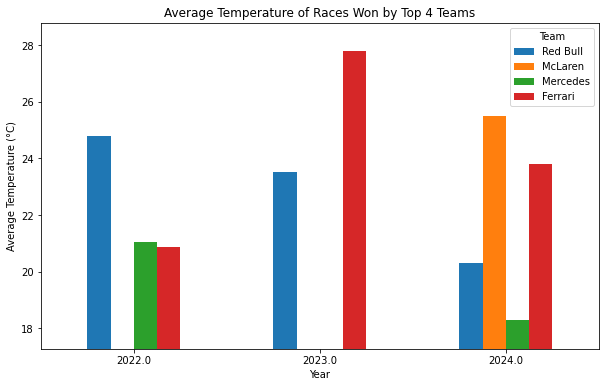

In [71]:
import matplotlib.pyplot as plt

results_df = pd.read_csv('data/results.csv')

top_teams = ['Red Bull', 'McLaren','Mercedes','Ferrari']


winners_df = results_df[results_df["positionOrder"] == 1].merge(
    races_with_locations[["raceId", "year", "temp", 'precipitation']],
    on="raceId",
    how="left"
)

constructors_df = pd.read_csv('data/constructors.csv')

winners_df = winners_df.merge(constructors_df[["constructorId", "name"]], on="constructorId", how="left")
winners_df = winners_df[winners_df["name"].isin(top_teams)]

avg_temp_per_team = winners_df.groupby(["year", "name"])["temp"].mean().unstack()

avg_temp_per_team[top_teams].plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature of Races Won by Top 4 Teams")
plt.legend(title="Team")
plt.xticks(rotation=0)
plt.ylim(avg_temp_per_team.min().min()-1,avg_temp_per_team.max().max()+1)
plt.show()

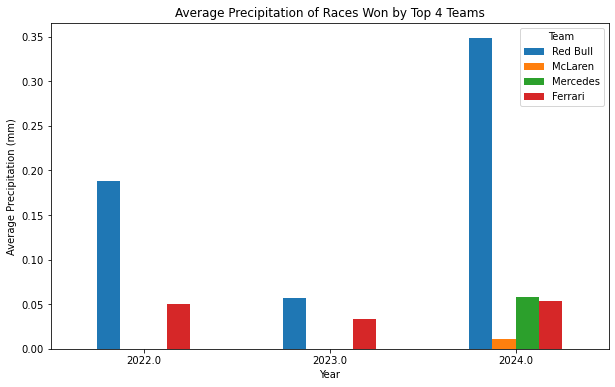

In [73]:
avg_precip_per_team = winners_df.groupby(["year", "name"])["precipitation"].mean().unstack()

avg_precip_per_team[top_teams].plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Average Precipitation (mm)")
plt.title("Average Precipitation of Races Won by Top 4 Teams")
plt.legend(title="Team")
plt.xticks(rotation=0)

plt.show()

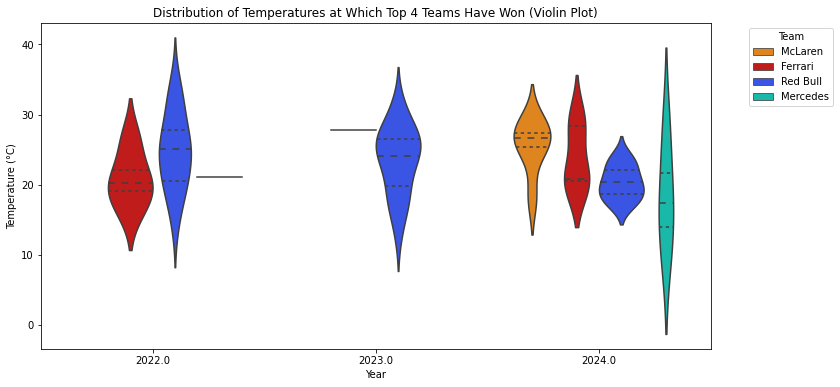

In [70]:
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

team_colors = {
    "Mercedes": "#00D2BE",  # Teal
    "Red Bull": "#1E41FF",  # Blue
    "Ferrari": "#DC0000",   # Red
    "McLaren": "#FF8700"    # Orange
}

# Create violin plot
sns.violinplot(data=winners_df, x="year", y="temp", hue="name", inner="quartile", palette=team_colors)

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Distribution of Temperatures at Which Top 4 Teams Have Won (Violin Plot)")
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()